In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  
        self.fc2 = nn.Linear(128, 64)  
        self.fc3 = nn.Linear(64, 10)  

    def forward(self, x):
        x = x.view(-1, 28 * 28)  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

In [5]:
model = Net()
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001) 

In [6]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()  

        outputs = model(images) 
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs} - Loss: {running_loss / len(trainloader)}")

Epoch 1/5 - Loss: 0.4090728844120813
Epoch 2/5 - Loss: 0.20170296172597516
Epoch 3/5 - Loss: 0.14633330386449725
Epoch 4/5 - Loss: 0.11770403486336949
Epoch 5/5 - Loss: 0.10132652508722408


In [8]:
correct = 0
total = 0

with torch.no_grad():  
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nTest accuracy: {100 * correct / total}%')


Test accuracy: 97.09%


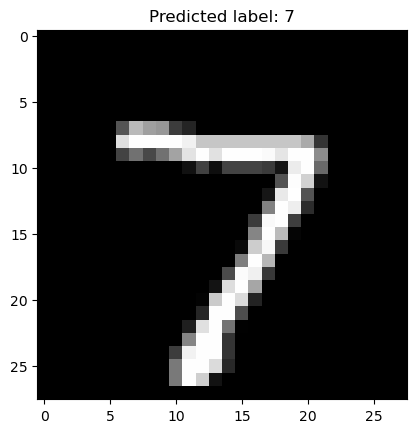

In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

plt.imshow(images[0].view(28, 28).numpy().squeeze(), cmap='gray')
plt.title(f"Predicted label: {predicted[0].item()}")
plt.show()